In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.metrics import mean_squared_error
%matplotlib inline



# ***1-Get the Data***

In [ ]:
 drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/diabetes2.csv')

# ***2-Take a Quick Look at the Data Structure***

### **Shape of Data**

In [ ]:
data.shape

(768, 9)

### **Name of Columns**

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### **Top five rows**

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **Quick description of the data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### **Summary of numerical attributes**

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### **Value Counts of the feature Outcome.**

In [ ]:
data.value_counts("Outcome")

Outcome
0    500
1    268
dtype: int64

This means that in this dataset from 768 instances 268 person have Diabetes and 500 have not.

# ***3-Discover and Visualize the data to gain insights***

## Plot a Histogram which displays the data value in bars to show the frequency of data items in successive numerical intervals of equal size.

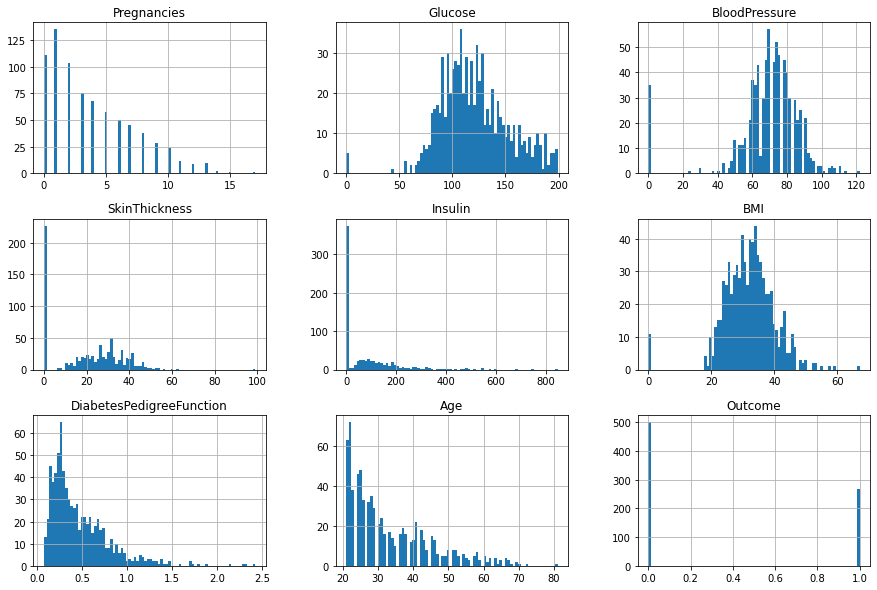

## visualize data using scatter plot

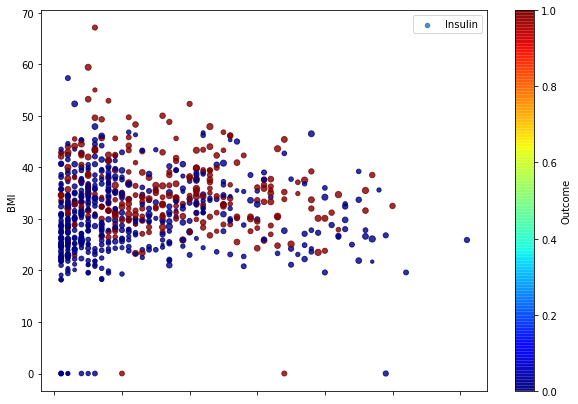

In [ ]:
data.plot (kind="scatter",x="Age",y="BMI",alpha=0.8, figsize=(10,7),s=data["Glucose"]/5,label="Insulin",c="Outcome",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()
plt.show()

## Looking for correlations .It help to identify the absence or presence of a relationship between two variables.

In [ ]:
corr_matrix=data.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

we note that the Glucose feature has the most affect on the Outcome.

**Show the Correlations by plotting.**

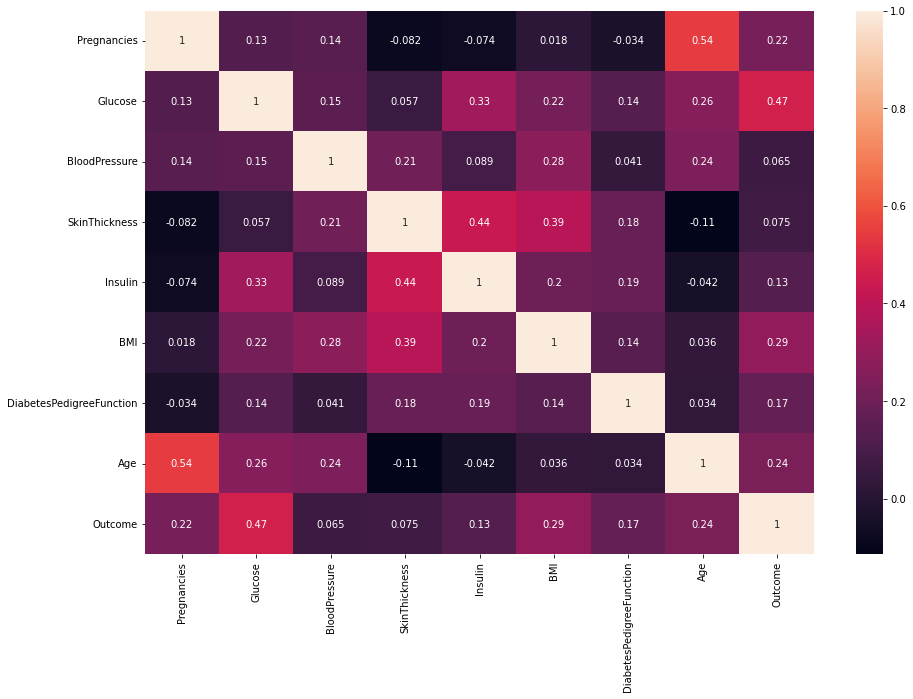

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot = True)
plt.show()

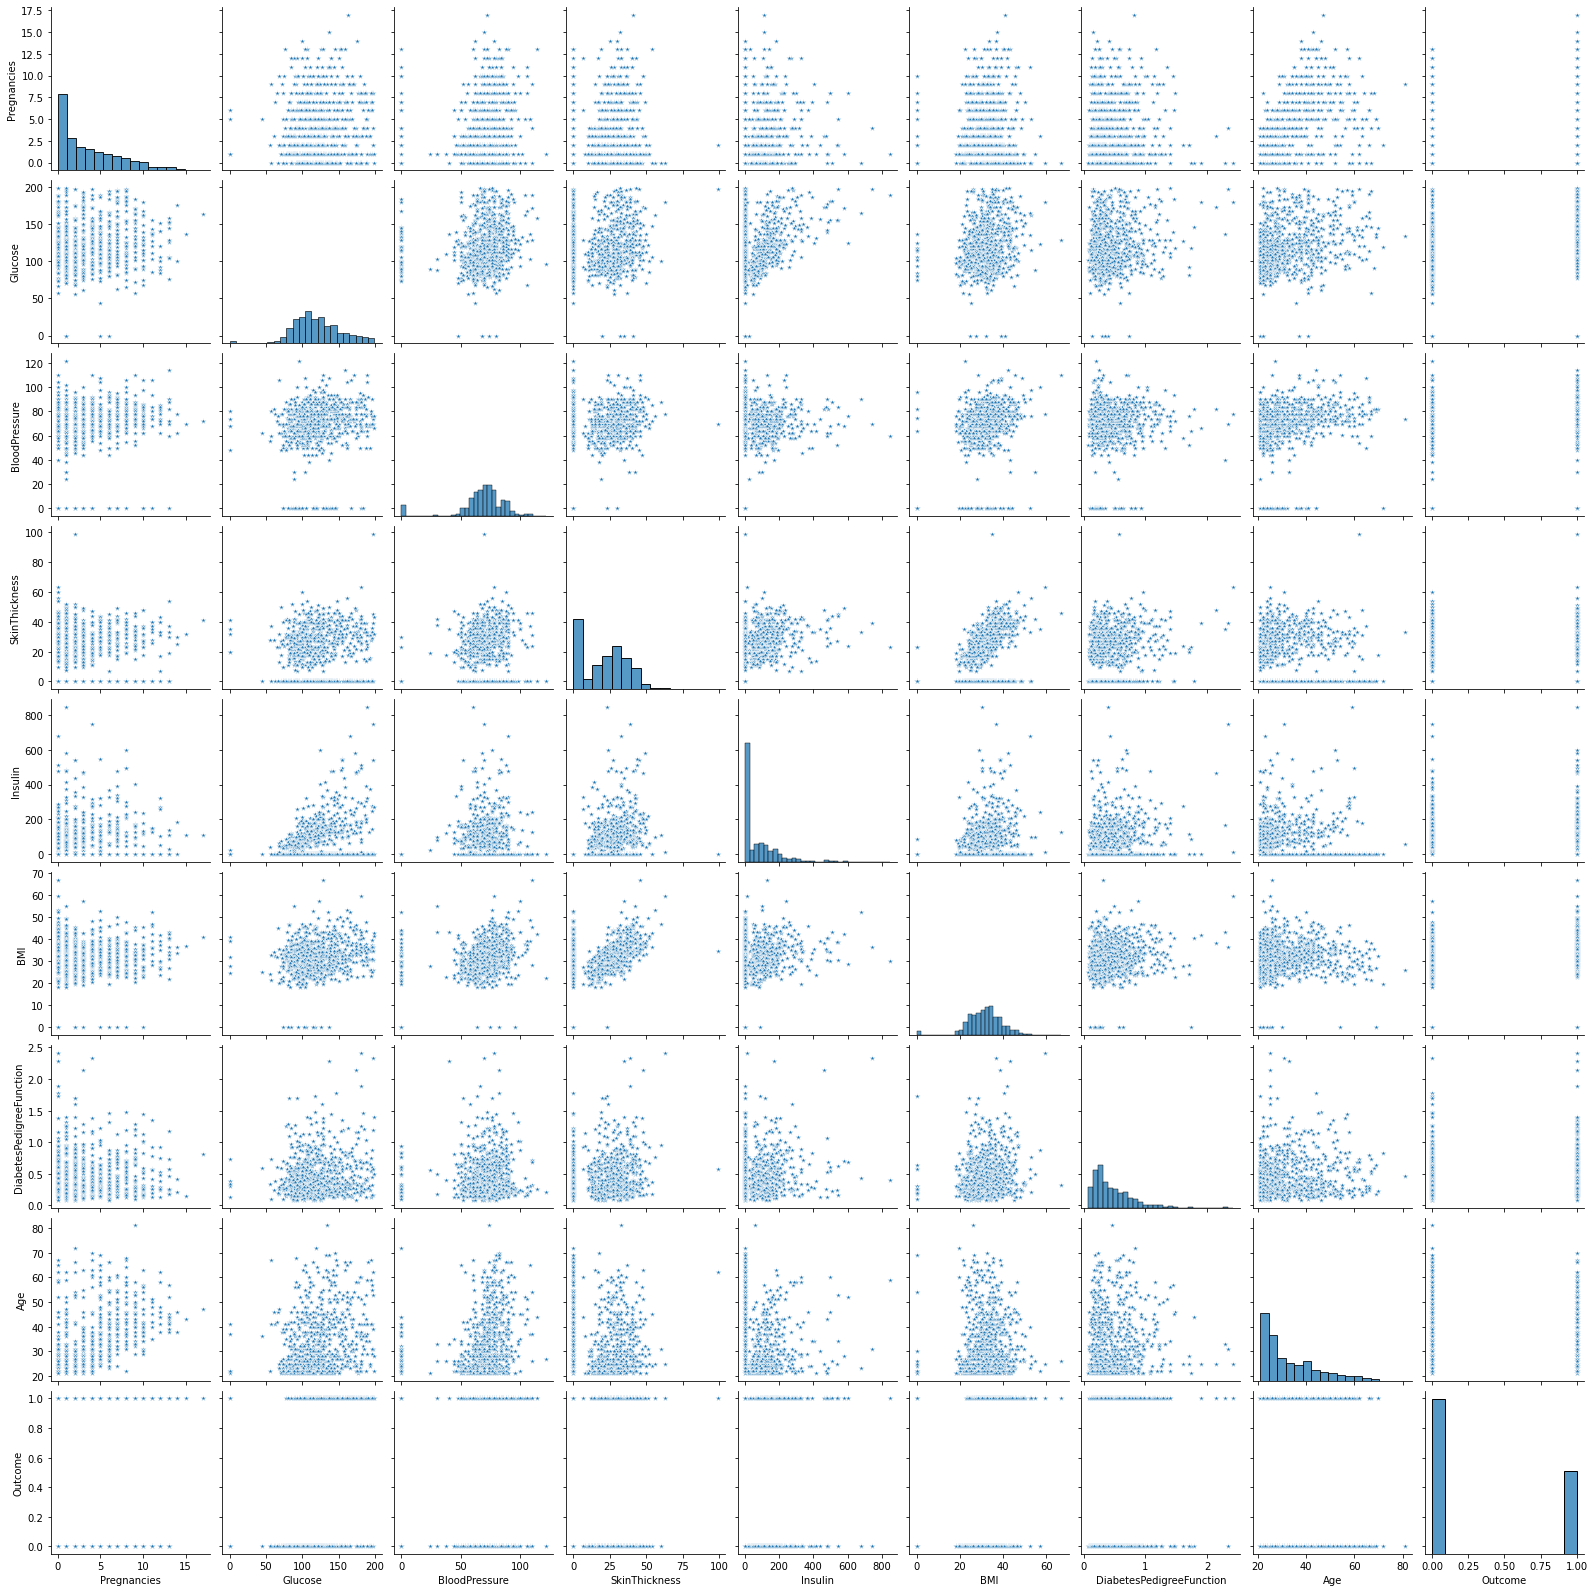

In [ ]:
from seaborn.relational import scatterplot
#By Scatter plot
sns.pairplot(data=data, markers='*')
plt.show()

# ***4-Create a Test Set : Using Scikit-Learn functions***

Split the data as 80% for train set and 20% for test set

In [ ]:

train_set,test_set=train_test_split(data,test_size=0.2,random_state=42)


Seperate the features from the response

In [ ]:

train_set_features=train_set.drop("Outcome",axis=1)
train_set_label= train_set["Outcome"].copy()
test_set_features=test_set.drop("Outcome",axis=1)
test_set_label=test_set["Outcome"].copy()

# ***5-Prepare the data for machine learning algorithms***

**A) Check if there is a missing value or not**

In [ ]:
train_set_features.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

There is no any missing value in **train set feature.**



In [ ]:
test_set_features.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

There is no any missing value in **test set feature.**

**B) Check if there is a categorical value or not.**

In [ ]:
train_set_features.select_dtypes(include=['category','int','float']).dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

There is no any categorical value in **train set feature.**

In [ ]:
test_set_features.select_dtypes(include=['category','int','float']).dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

There is no any categorical value in **test set feature.**

**C) Feature Scaling**

Feature Scaling helps the ML algorithms perform well.

In [ ]:
scaler = StandardScaler()

Scale the features of **train set**.

In [ ]:
train_set_features[train_set_features.columns] = scaler.fit_transform(train_set_features[train_set_features.columns])
train_set_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
618,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
346,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
294,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
231,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095


Scale the features of **test set**.

In [ ]:
test_set_features[test_set_features.columns] = scaler.fit_transform(test_set_features[test_set_features.columns])
test_set_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.491242,-0.726678,-0.441476,0.667308,1.051919,0.233748,-0.170941,0.666612
324,-0.633683,-0.285349,0.318908,0.611305,-0.660221,0.435379,-1.086080,-1.073358
624,-0.633683,-0.411443,-0.173105,-1.180790,-0.660221,-0.145794,-1.053629,-1.073358
690,1.053704,-0.442966,0.542551,-1.180790,-0.660221,-0.881156,1.211504,-0.045194
473,0.772473,0.471215,0.989836,-1.180790,-0.660221,-0.252540,-0.884879,1.220238


# ***6-Selec , Train and Evaluate a model***

**A) SGD Classifier**

In [ ]:
SGD_clf=SGDClassifier(random_state=42)
SGD_clf.fit(train_set_features,train_set_label)
SGD_clf.predict(train_set_features)

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,

**Accuracy :**

In [ ]:
cross_val_score(SGD_clf,train_set_features,train_set_label,cv=3,scoring="accuracy",)

array([0.67804878, 0.65365854, 0.66176471])

**Confusion Matrix**


A confusion matrix is a summarized table of the number of correct and incorrect predictions (or actual and predicted values) yielded by a classifier (or classification model) for binary classification tasks.

It is Known the better accuracy of confusion when the number in diagonal matrix is higher than others.

In [ ]:
train_set_label_predict= cross_val_predict(SGD_clf,train_set_features,train_set_label,cv=3)

In [ ]:
cnf_matrix=confusion_matrix(train_set_label,train_set_label_predict)
cnf_matrix

array([[329,  72],
       [134,  79]])

**B) RandomForestClassifier**

In [ ]:
forest_clf=RandomForestClassifier(random_state=42)
forest_clf.fit(train_set_features,train_set_label)
forest_clf.predict(train_set_features)

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

**Accuracy :**

In [ ]:
cross_val_score(forest_clf,train_set_features,train_set_label,cv=3,scoring="accuracy")

array([0.7902439 , 0.75609756, 0.74509804])

we note that the accuracy for  RandomForestClassifier model is better than the accuaracy of SGD Classifier.

**Confusion Matrix**

In [ ]:
train_set_label_predict_forest= cross_val_predict(forest_clf,train_set_features,train_set_label,cv=3)

**C) KNeighborsClassifier**

In [ ]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(train_set_features,train_set_label)
knn_clf.predict(train_set_features)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,

**Accuracy :**

In [ ]:
cross_val_score(knn_clf,train_set_features,train_set_label,cv=3,scoring="accuracy")

array([0.73658537, 0.75121951, 0.74509804])

we note that the accuracy for RandomForestClassifier model **also** is better than the accuaracy of KNeighborsClassifier.

**Confusion Matrix**

In [ ]:
train_set_label_predict_knn= cross_val_predict(knn_clf,train_set_features,train_set_label,cv=3)

In [ ]:
cnf_matrix=confusion_matrix(train_set_label,train_set_label_predict_knn)
cnf_matrix

array([[339,  62],
       [ 95, 118]])

**D) DecisionTreeClassifier**

In [ ]:
Decision_clf=DecisionTreeClassifier()
Decision_clf.fit(train_set_features,train_set_label)
Decision_clf.predict(train_set_features)

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

**Accuracy :**

In [ ]:
cross_val_score(Decision_clf,train_set_features,train_set_label,cv=3,scoring="accuracy")

array([0.72682927, 0.72682927, 0.71078431])

 the accuracy for RandomForestClassifier model **also** is better than the accuaracy of DecisionTreeClassifier model.

**Confusion Matrix**

In [ ]:
train_set_label_predict_Decision= cross_val_predict(Decision_clf,train_set_features,train_set_label,cv=3)

In [ ]:
cnf_matrix=confusion_matrix(train_set_label,train_set_label_predict_Decision)
cnf_matrix

array([[319,  82],
       [ 89, 124]])

**E) Support Vector Machines (SVMs) Classifier**

In [ ]:
svm_clf = svm.SVC()
svm_clf.fit(train_set_features,train_set_label)
svm_clf.predict(train_set_features)

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

**Accuracy :**

In [ ]:
cross_val_score(svm_clf,train_set_features,train_set_label,cv=3,scoring="accuracy")

array([0.76585366, 0.75121951, 0.75490196])

the accuracy for svm Classifier model is close to  the accuaracy of RandomForestClassifier model.

**Confusion Matrix**

In [ ]:
train_set_label_predict_svm= cross_val_predict(svm_clf,train_set_features,train_set_label,cv=3)

In [ ]:
cnf_matrix=confusion_matrix(train_set_label,train_set_label_predict_svm)
cnf_matrix

array([[348,  53],
       [ 96, 117]])

In [ ]:
cnf_matrix=confusion_matrix(train_set_label,train_set_label_predict_forest)
cnf_matrix

array([[348,  53],
       [ 92, 121]])

but the Confusion matrix of RandomForestClassifier classifier is better than svm

**F) Logistic Regression Classifier**

In [ ]:
log_clf = LogisticRegression()
log_clf.fit(train_set_features,train_set_label)
log_clf.predict(train_set_features)

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

**Accuracy :**

In [ ]:
cross_val_score(log_clf,train_set_features,train_set_label,cv=3,scoring="accuracy")

array([0.8       , 0.76585366, 0.73529412])

The Accuracy of Logistic Regression model **is better** **than the accuracy of all** above classifiers models.

**Confusion Matrix**

In [ ]:
train_set_label_predict_log= cross_val_predict(log_clf,train_set_features,train_set_label,cv=3)

In [ ]:
cnf_matrix=confusion_matrix(train_set_label,train_set_label_predict_log)
cnf_matrix

array([[349,  52],
       [ 91, 122]])

Also,The Confusion Matrix of Logistic Regression model **is better than the Confusion Matrix of all** above classifiers models.

# ***The Logistic Regression is the better Model.***

## **Evaluate the model on the Test Set (before Fine-Tune it)**

In [ ]:
predict=log_clf.predict(test_set_features)
predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

**Accuracy :**

In [ ]:
cross_val_score(log_clf,test_set_features,test_set_label,cv=3,scoring="accuracy")

array([0.67307692, 0.82352941, 0.76470588])

**Confusion Matrix**

In [ ]:
test_set_label_predict_log= cross_val_predict(log_clf,test_set_features,test_set_label,cv=3)

In [ ]:
cnf_matrix=confusion_matrix(test_set_label,test_set_label_predict_log)
cnf_matrix

array([[85, 14],
       [24, 31]])

# ***7-Fine-Tune the model***

Using Fine-Tune helps to improve the Accuracy of the Model.

In [ ]:
param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

In [ ]:
grid_search=GridSearchCV(log_clf,param_grid,cv=3,scoring='accuracy',return_train_score=True)

In [ ]:
grid_search.fit(train_set_features,train_set_label)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search.best_params_

{'C': 10.0, 'penalty': 'l2'}

In [ ]:
final_model=grid_search.best_estimator_

In [ ]:
final_prediction=final_model.predict(test_set_features)

## **ReEvaluate the model on train set after Fine-tune it.**

**Accuracy :**

In [ ]:
cross_val_score(final_model,train_set_features,train_set_label,cv=3,scoring="accuracy")

array([0.8       , 0.76585366, 0.74509804])

**Confusion Matrix**

In [ ]:
train_set_label_predict_final= cross_val_predict(final_model,train_set_features,train_set_label,cv=3)

In [ ]:
cnf_matrix=confusion_matrix(train_set_label,train_set_label_predict_final)
cnf_matrix

array([[349,  52],
       [ 89, 124]])

# ***After Fine-tune the model ,the Accuracy and Confusion Matrix on train set are improved.***

## ***Evaluate the model on the Test Set (After Fine-Tune it)***

In [ ]:
predict1=final_model.predict(test_set_features)
predict1

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

**Accuracy:**

In [ ]:
cross_val_score(final_model,test_set_features,test_set_label,cv=3,scoring="accuracy")

array([0.71153846, 0.84313725, 0.78431373])

**Confusion Matrix**

In [ ]:
test_set_label_predict_final= cross_val_predict(final_model,test_set_features,test_set_label,cv=3)

In [ ]:
cnf_matrix=confusion_matrix(test_set_label,test_set_label_predict_final)
cnf_matrix

array([[87, 12],
       [22, 33]])

# **After Fine-tune the model ,the Accuracy and Confusion Matrix on test set are improved**

# ***8-Save the final best model***

In [ ]:
joblib.dump(final_model,"my_model.pkl")

['my_model.pkl']

In [ ]:
my_model_loaded=joblib.load("my_model.pkl")